In [1]:
%matplotlib inline

In [2]:
from js import fetch
import pandas as pd
from datetime import datetime
import random

In [3]:
res = await fetch('https://quepid-pr-544.herokuapp.com/api/cases/2293/snapshots/1160.json')
snapshot = await res.json()

In [21]:
queryData = []

for snapshotQuery in snapshot.queries:
    queryData.append({'snapshot_id':snapshot.id, 'query':snapshotQuery.query_text, 'score':random.uniform(0, 1)})

In [22]:
df = pd.DataFrame(queryData)
df

,snapshot_id,query,score
0,1160,star,0.452363
1,1160,bob,0.528899
2,1160,dude,0.293695


In [12]:
df.groupby(pd.cut(df["score"], 5))

In [13]:
df

,query,score
0,star,0.168967
1,bob,0.112508
2,dude,0.371901


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

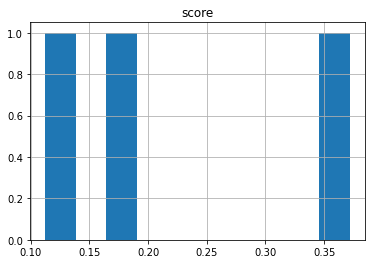

In [14]:
df.hist()

<AxesSubplot:xlabel='score'>

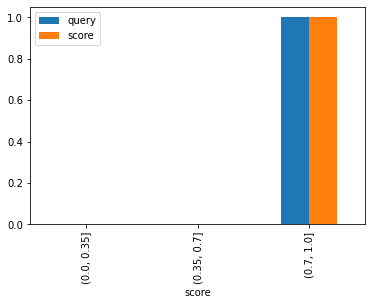

In [20]:
bins = [0,0.35,0.7,1]
df = df.groupby(pd.cut(df['score'], bins=bins)).count()
#df.plot(kind='bar', x='query', y='score')
df.plot(kind='bar')